This is the second example about diffusion. In this one, we will show that diffusion, coupled with degradation and non-uniform synthesis, can result in concentration gradients.

The code for this example is mostly identical to that of the previous example, therefore we will only explain the parts that differ from the previous example.

# Preparation

In [1]:
%matplotlib notebook

# Imports

In [2]:
import multicell
import numpy as np

# Problem definition

## Simulation and tissue structure

In [3]:
sim = multicell.simulation_builder.generate_cell_grid_sim(20, 1, 1, 1e-3)

## Biological species

In [4]:
sim.register_cell_variable("a")

## Constants

In this example, we introduce two additional constants. `mu_a` is the degradation - and turnover - rate of `a` (common to all cells) and `A` is a relative synthesis rate of `a` (20 in the first 10 cells do, 0 in the others).

In [5]:
A = np.array([20] * 10 + [0] * 10)
sim.set_constants({"D_a": 100., "mu_a": 1., "A": A})

## Differential equations

This time, the differential equation governing *a* is slightly more complex, as it includes a degradation term and a synthesis term.

In [6]:
def da_dt(simulation, a, c_a, D_a, mu_a, A, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_a, c_a, adjacency_matrix) - mu_a * a + mu_a * A

sim.set_ODE("a", da_dt)

The equation is designed so that the system has a steady state, and the total amount of `a` in the system at that steady state is independent of the value of `mu_a`, the turnover rate. We can therefore safely change the value of `mu_a` to modify the turnover without affecting the scale of the concentration values, which is useful for visualization purposes.

## Initial conditions

In [7]:
sim.initialize_cell_variables()

a0 = A # Same as in the previous example

sim.set_cell_variable("a", a0)

## Duration

In [8]:
sim.set_duration(4)
sim.set_time_steps(10, "log2")

## Rendering

In [9]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "c_a", {"max_cmap": 20, "view": (90, -90), "axes": False})

# Visualization of the initial state

<IPython.core.display.Javascript object>


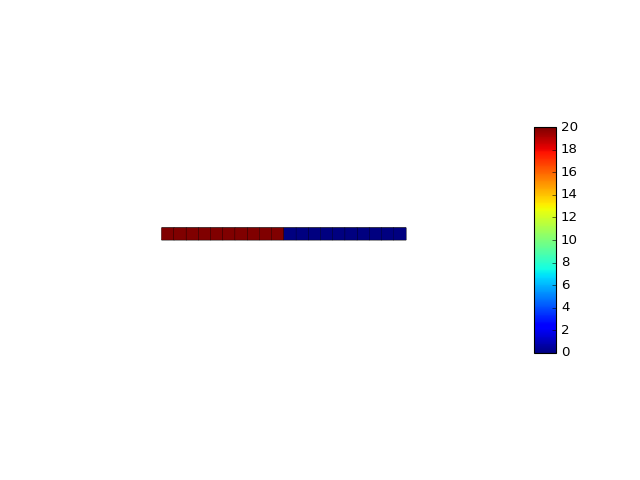

Time point: 0.0
c_a: from 0.0 to 20.0114678814


In [10]:
sim.renderer.display("c_a")

# Simulation

<IPython.core.display.Javascript object>


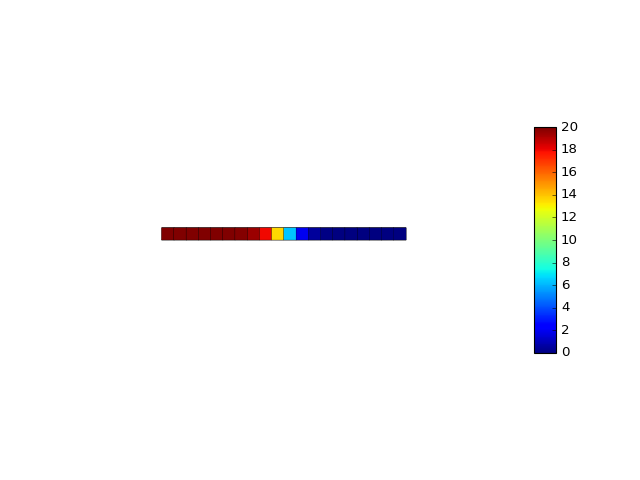

Time point: 0.0078125
c_a: from 1.18271777959e-07 to 19.9998196838


<IPython.core.display.Javascript object>


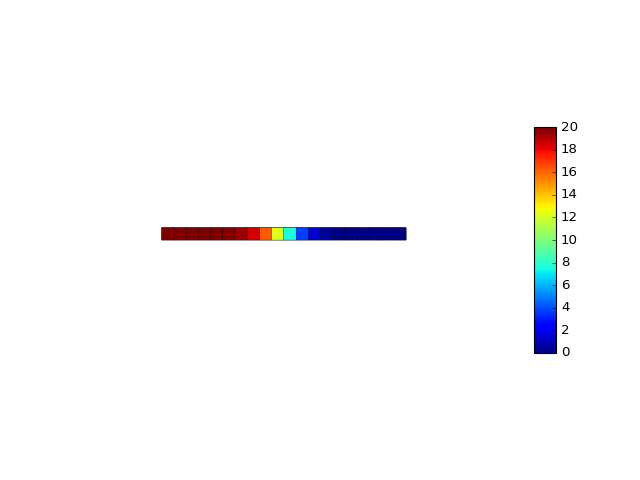

Time point: 0.015625
c_a: from 3.40689200503e-05 to 19.9945245187


<IPython.core.display.Javascript object>


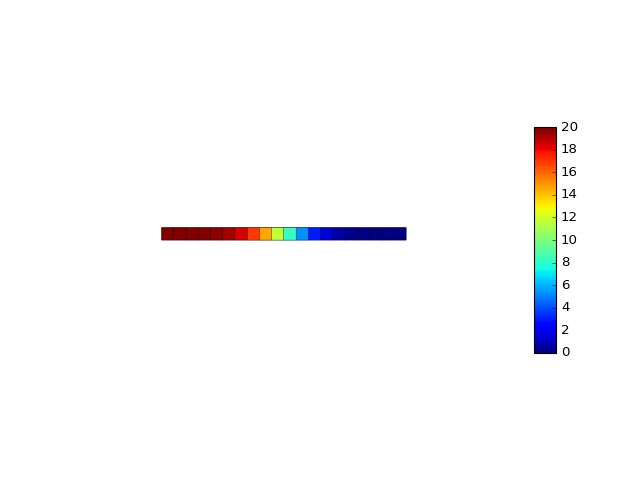

Time point: 0.03125
c_a: from 0.00368627258512 to 19.9893159191


<IPython.core.display.Javascript object>


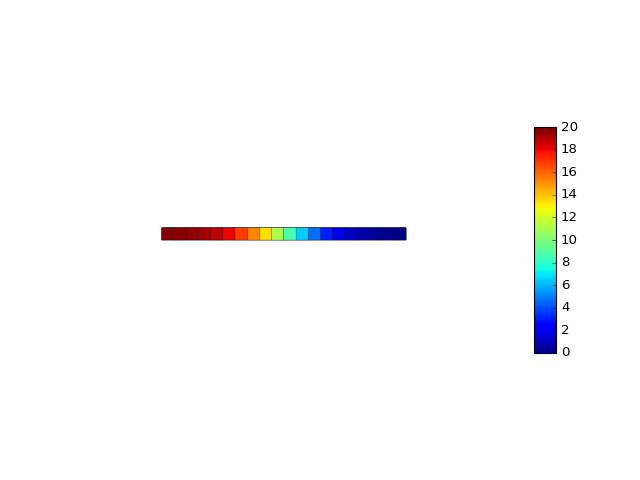

Time point: 0.0625
c_a: from 0.106806599049 to 19.8882833579


<IPython.core.display.Javascript object>


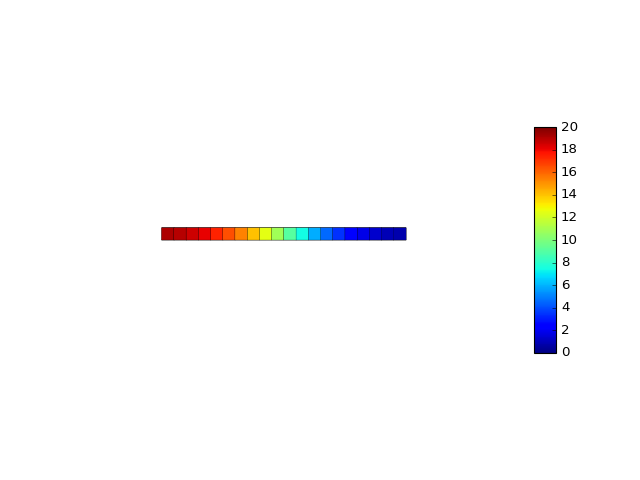

Time point: 0.125
c_a: from 0.849797545315 to 19.1472791957


<IPython.core.display.Javascript object>


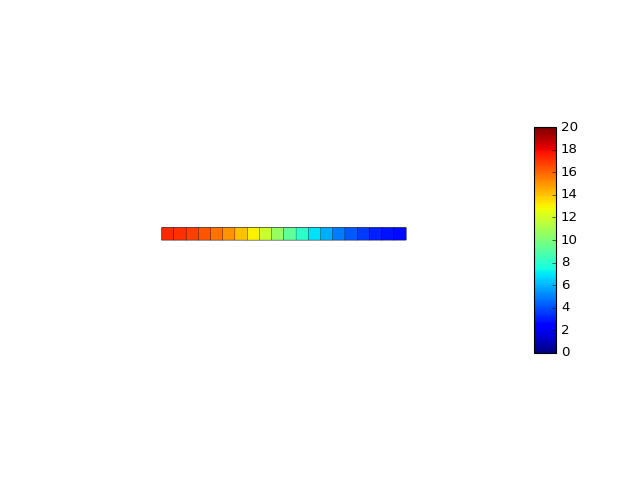

Time point: 0.25
c_a: from 2.69338014729 to 17.305347038


<IPython.core.display.Javascript object>


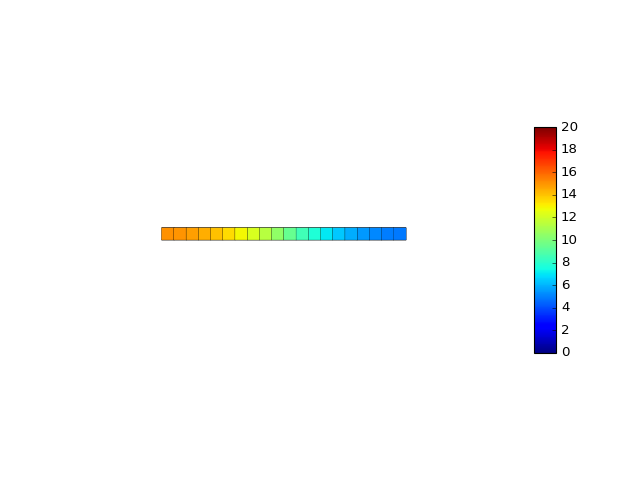

Time point: 0.5
c_a: from 4.88245197264 to 15.1171138453


<IPython.core.display.Javascript object>


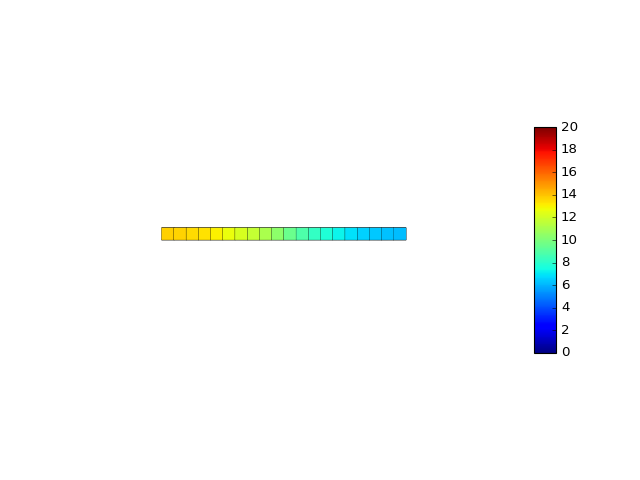

Time point: 1.0
c_a: from 6.19930035089 to 13.8005401514


<IPython.core.display.Javascript object>


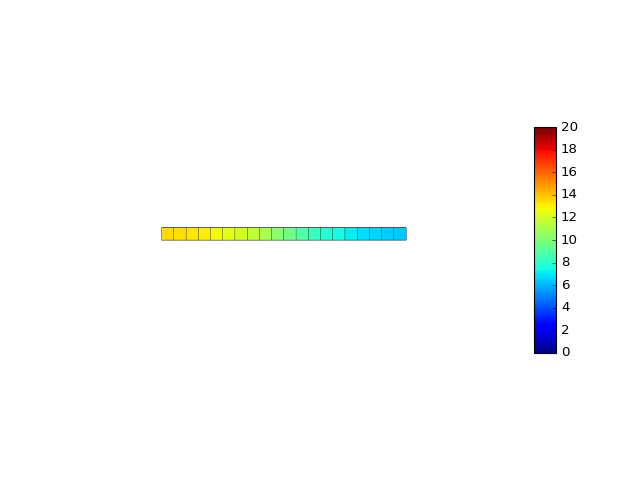

Time point: 2.0
c_a: from 6.47387224614 to 13.5260191081


<IPython.core.display.Javascript object>


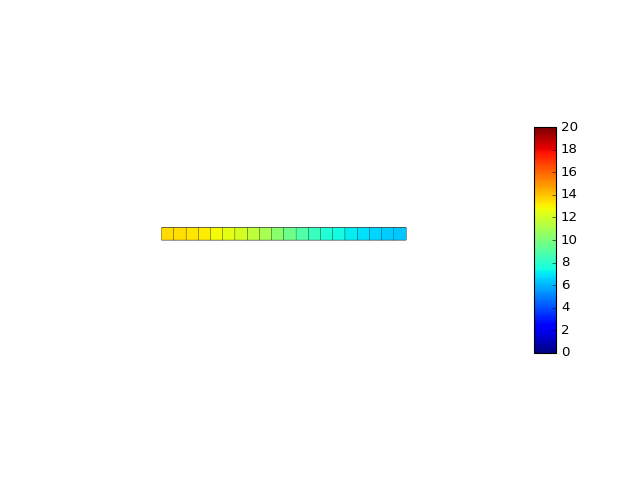

Time point: 4.0
c_a: from 6.48275714554 to 13.5171358502


In [11]:
sim.simulate()

In this example, concentrations are no longer uniform at the steady state, as a result of the turnover of species `a`.

The competition between diffusion and turnover leads to the formation of concentration gradients around the source of the species. The steepness of the gradient depends on diffusion and turnover rates, relative to each other. The faster the diffusion and the slower the turnover, the smoother the gradient.

Changing the values of `D_a` and `mu_a` will affect the steady state. Increasing values of `mu_a` will increase the turnover rate, while increasing the value of `D_a` will increase the diffusion rate.